# Negation signal - with bag of words

## Definition of all the imports and constants

In [1]:
# Define all the imports and constants
import pickle

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from utils.dataset import preprocess_dataset, get_datasets, load_dataset, dataset_name
from utils.signal import create_semi_dataset, create_columns_names, create_features_list, show_metrics_on_all_datasets
from utils.common import print_score, show_roc_curve, save_model, create_vectorizer

FUNCTIONS = {
        'create_semi_dataset': create_semi_dataset,
        'create_vectorizer': create_vectorizer,
        'create_columns_names': create_columns_names,
        'create_features_list': create_features_list,
}

SUFFIX = 'sig-bow'

## Creation of datasets & preprocessing

In [2]:
# Preprocess SNK dataset
vect_lemma = preprocess_dataset('dataset/snk/merged.xml', SUFFIX, True, FUNCTIONS)

utils.dataset - INFO - ***** Create dataset snk *****


utils.dataset - INFO - [START] Creating semi dataset


utils.dataset - INFO - [START] Creating features list - train


utils.dataset - INFO - [START] Creating features list - test


utils.dataset - INFO - [START] Saving CSV


utils.dataset - INFO - [FINISH] Saving CSV


In [3]:
%%time
# Preprocess all datasets - it takes a long time

for dataset in get_datasets(with_all=False):
    preprocess_dataset(dataset, SUFFIX, True, FUNCTIONS, vect_lemma)

utils.dataset - INFO - ***** Create dataset beletria *****


utils.dataset - INFO - [START] Creating semi dataset


utils.dataset - INFO - [START] Creating features list - train


utils.dataset - INFO - [START] Creating features list - test


utils.dataset - INFO - [START] Saving CSV


utils.dataset - INFO - [FINISH] Saving CSV


utils.dataset - INFO - ***** Create dataset recenzie *****


utils.dataset - INFO - [START] Creating semi dataset


utils.dataset - INFO - [START] Creating features list - train


utils.dataset - INFO - [START] Creating features list - test


utils.dataset - INFO - [START] Saving CSV


utils.dataset - INFO - [FINISH] Saving CSV


utils.dataset - INFO - ***** Create dataset snk *****


utils.dataset - INFO - [START] Creating semi dataset


utils.dataset - INFO - [START] Creating features list - train


utils.dataset - INFO - [START] Creating features list - test


utils.dataset - INFO - [START] Saving CSV


utils.dataset - INFO - [FINISH] Saving CSV


utils.dataset - INFO - ***** Create dataset sport *****


utils.dataset - INFO - [START] Creating semi dataset


utils.dataset - INFO - [START] Creating features list - train


utils.dataset - INFO - [START] Creating features list - test


utils.dataset - INFO - [START] Saving CSV


utils.dataset - INFO - [FINISH] Saving CSV


utils.dataset - INFO - ***** Create dataset vlastne_mario *****


utils.dataset - INFO - [START] Creating semi dataset


utils.dataset - INFO - [START] Creating features list - train


utils.dataset - INFO - [START] Creating features list - test


utils.dataset - INFO - [START] Saving CSV


utils.dataset - INFO - [FINISH] Saving CSV


CPU times: user 10min 33s, sys: 1min 23s, total: 11min 56s
Wall time: 12min 22s


## Training

In [4]:
%%time

# Load preprocessed dataset
DATASET = 'dataset/snk/merged.csv'
X_train, X_test, Y_train, Y_test = load_dataset(DATASET, SUFFIX, ['token', 'lemma', 'POS', 'is_negation'])

CPU times: user 20.2 s, sys: 2.55 s, total: 22.7 s
Wall time: 25 s


In [8]:
%%time

ALGORITHM = 'RandomForest'

# Train a model using the training sets 
# model = MultinomialNB()
# model = GaussianNB()
# model = BernoulliNB()
# model = SVC()
model = RandomForestClassifier(n_estimators=100, bootstrap=False, criterion='gini')

model.fit(X_train, Y_train.is_negation)

CPU times: user 11.4 s, sys: 1.49 s, total: 12.9 s
Wall time: 13.7 s


## Metrics

In [1]:
y_predicted = model.predict(X_test)
y_true = Y_test.is_negation

# Print basic metrics
print_score(y_predicted, y_true)

# Show ROC curve
show_roc_curve(y_predicted, y_true, save_name='{}-{}-{}-main.svg'.format(SUFFIX, dataset_name(DATASET), ALGORITHM))

NameError: name 'model' is not defined

## Metric on all datasets

beletria


Accuracy: 0.9973762342056204
Precision: 0.9713114754098361
Recall: 0.8843283582089553
F1 score: 0.9257812500000001
Classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     14215
          1       0.97      0.88      0.93       268

avg / total       1.00      1.00      1.00     14483



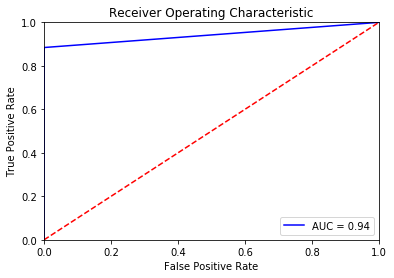

recenzie


Accuracy: 0.9965441886466433
Precision: 0.9826589595375722
Recall: 0.723404255319149
F1 score: 0.8333333333333334
Classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19442
          1       0.98      0.72      0.83       235

avg / total       1.00      1.00      1.00     19677



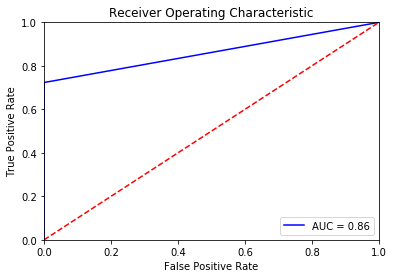

snk


Accuracy: 0.9978503869303526
Precision: 1.0
Recall: 0.9526813880126183
F1 score: 0.975767366720517
Classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      6661
          1       1.00      0.95      0.98       317

avg / total       1.00      1.00      1.00      6978



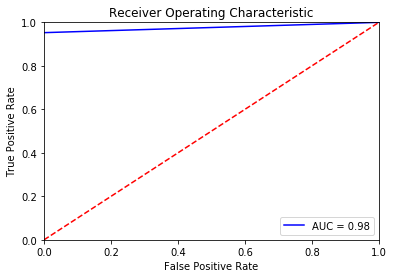

sport


Accuracy: 0.9971270622034563
Precision: 0.9766666666666667
Recall: 0.8323863636363636
F1 score: 0.8987730061349694
Classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     22621
          1       0.98      0.83      0.90       352

avg / total       1.00      1.00      1.00     22973



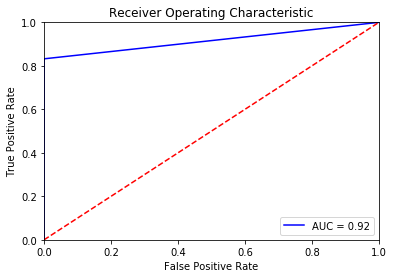

vlastne_mario


Accuracy: 0.9605911330049262
Precision: 0.9767441860465116
Recall: 0.6461538461538462
F1 score: 0.7777777777777778
Classification report:
             precision    recall  f1-score   support

          0       0.96      1.00      0.98       544
          1       0.98      0.65      0.78        65

avg / total       0.96      0.96      0.96       609



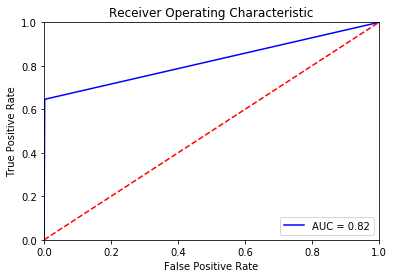

In [11]:
# Load model
with open('saved_models/model-{}-{}.pkl'.format(ALGORITHM, SUFFIX), 'rb') as f:
    model = pickle.load(f)

show_metrics_on_all_datasets(model, SUFFIX, ALGORITHM, with_all=False)

## Save model

In [10]:
save_model(model, 'model-{}-{}.pkl'.format(ALGORITHM, SUFFIX))

## Grid Search

In [2]:
# Grid Search for Algorithm Tuning

param_grid = {"n_estimators": [60, 100, 200],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# param_grid = {"max_depth": [3, None],
#               "max_features": [1, 3, 10],
#               "min_samples_split": [2, 3, 5, 10],
#               "min_samples_leaf": [1, 3, 10],
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]}

# create and fit a ridge regression model, testing each alpha
model = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=metrics.make_scorer(metrics.f1_score))
grid.fit(X_train, Y_train.is_negation)

# summarize the results of the grid search
print(grid)
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [60, 100, 200], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score), verbose=0)
0.891358024691
{'n_estimators': 100, 'bootstrap': False, 'criterion': 'entropy'}
